# Example code 

Author: Luis Quispe Macavilca\
Email: luisquispemaca@gmail.com

We use the "Seatbelts" dataset from Stock and Watson (2008). (Original dataset from Cohen & Einav, 2001) \
First, we solve the excersices from the Panel Data section.\
Finally, we create some geographical plots.


### Econometrics

We use a relevant package for Panel Data Analysis in Python, similar to the $plm$ library used in R.

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# import dataset

seatbelts = pd.read_excel("SeatBelts.xls")
seatbelts # visualize data

,state,year,fips,vmt,fatalityrate,sb_useage,speed65,speed70,drinkage21,ba08,income,age,primary,secondary
0,AK,1983,2,3358,0.044669,NaN,0,0,1,0,17973,28.23497,0,0
1,AK,1984,2,3589,0.037336,NaN,0,0,1,0,18093,28.34354,0,0
2,AK,1985,2,3840,0.033073,NaN,0,0,1,0,18925,28.37282,0,0
3,AK,1986,2,4008,0.025200,NaN,0,0,1,0,18466,28.39665,0,0
4,AK,1987,2,3900,0.019487,NaN,0,0,1,0,18021,28.45325,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,WY,1993,56,6770,0.017725,0.67,1,0,1,0,19535,34.21438,0,1
761,WY,1994,56,6689,0.021528,0.70,1,0,1,0,19865,34.45578,0,1
762,WY,1995,56,7044,0.024134,0.71,1,1,1,0,20685,34.76661,0,1
763,WY,1996,56,7360,0.019429,0.72,1,1,1,0,21524,35.07435,0,1


**1. Estimate the effect of seat belt use on fatalities by regressing the variable *FatalityRate* on the variables *sb–useage, speed65, speed70, ba08, drinkage21, ln(income)*, and *age*.**


Does regression estimates suggest that increased seat belt use reduces fatalities?

 *Method 1: Linear regression*

In [3]:
# create new vars if it is needed
seatbelts["ln_income"] = np.log(seatbelts["income"]) #we need ln(income)

# state the dependent and independent variables formula:
formula_l = 'fatalityrate ~ sb_useage + speed65 + speed70 + ba08 + drinkage21 + ln_income + age'

In [4]:
# create a simple ols model
ols_linear = smf.ols(formula = formula_l, data = seatbelts).fit()

# print results of the regression
print(ols_linear.summary())

                            OLS Regression Results                            
Dep. Variable:           fatalityrate   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     95.41
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.26e-90
Time:                        20:25:57   Log-Likelihood:                 2375.7
No. Observations:                 556   AIC:                            -4735.
Df Residuals:                     548   BIC:                            -4701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1965      0.008     23.902      0.0

 *Method 2: Using Panel Data package: Pooled-OLS*

In [5]:
# import pooled-ols package
from linearmodels.panel import PooledOLS

#set the identity axis and the temporary axis
year = pd.Categorical(seatbelts.year)               
seatbelts = seatbelts.set_index(["state", "year"])  #set id
seatbelts["year"] = year                            #set temp

# Let's see the dataset
seatbelts.head()


fips   vmt  fatalityrate  sb_useage  speed65  speed70  drinkage21  \
state year                                                                      
AK    1983     2  3358      0.044669        NaN        0        0           1   
      1984     2  3589      0.037336        NaN        0        0           1   
      1985     2  3840      0.033073        NaN        0        0           1   
      1986     2  4008      0.025200        NaN        0        0           1   
      1987     2  3900      0.019487        NaN        0        0           1   

            ba08  income       age  primary  secondary  ln_income  year  
state year                                                               
AK    1983     0   17973  28.23497        0          0   9.796626  1983  
      1984     0   18093  28.34354        0          0   9.803280  1984  
      1985     0   18925  28.37282        0          0   9.848239  1985  
      1986     0   18466  28.39665        0          0   9.823686  1986  
      1987     0   18021  28.45325        0          0   9.799293  1987

In [6]:
# select the exog vars

exog_vars = ["sb_useage","speed65", "speed70", "ba08", "drinkage21", "ln_income" ,"age"] #create a list of needed vars
exog = sm.add_constant(seatbelts[exog_vars])       #select from the dataset and add a constant for regression

exog #check

const  sb_useage  speed65  speed70  ba08  drinkage21  ln_income  \
state year                                                                    
AK    1983    1.0        NaN        0        0     0           1   9.796626   
      1984    1.0        NaN        0        0     0           1   9.803280   
      1985    1.0        NaN        0        0     0           1   9.848239   
      1986    1.0        NaN        0        0     0           1   9.823686   
      1987    1.0        NaN        0        0     0           1   9.799293   
...           ...        ...      ...      ...   ...         ...        ...   
WY    1993    1.0       0.67        1        0     0           1   9.879963   
      1994    1.0       0.70        1        0     0           1   9.896715   
      1995    1.0       0.71        1        1     0           1   9.937164   
      1996    1.0       0.72        1        1     0           1   9.976924   
      1997    1.0       0.75        1        1     0           1  10.025528   

                 age  
state year            
AK    1983  28.23497  
      1984  28.34354  
      1985  28.37282  
      1986  28.39665  
      1987  28.45325  
...              ...  
WY    1993  34.21438  
      1994  34.45578  
      1995  34.76661  
      1996  35.07435  
      1997  35.38646  

[765 rows x 8 columns]

In [7]:
#create the model and add the endog and exog vars
mod_1 = PooledOLS(seatbelts.fatalityrate, exog)   #args: (y, x)

mod_1  #check, it is a model

c:\Users\luisc\anaconda3\lib\site-packages\linearmodels\panel\model.py:854: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


PooledOLS 
Num exog: 8, Constant: True
id: 0x2778af099a0

In [9]:
# Results of the regression
pooled_res = mod_1.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:           fatalityrate   R-squared:                        0.5493
Estimator:                  PooledOLS   R-squared (Between):              0.4922
No. Observations:                 556   R-squared (Within):               0.6238
Date:                Tue, Jan 10 2023   R-squared (Overall):              0.5493
Time:                        20:30:09   Log-likelihood                    2375.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      95.407
Entities:                          51   P-value                           0.0000
Avg Obs:                       10.902   Distribution:                   F(7,548)
Min Obs:                       8.0000                                           
Max Obs:                       15.000   F-statistic (robust):             95.407
                            

Both methods bring the same results. This is possible because those regressions follow the same linear equation:

$y_i = \alpha + x_i + \epsilon_i$

**Does the regression estimate suggest that increased seat belt use reduces fatalities?**

Ironically, the regression shows us that the greater the use of seat belts, the greater the possibility of failing in a traffic accident.

 The coefficient of the variable *sb_usage* has a positive slope, increasing the mortality rate of traffic accidents if the seat belt is used.

**2. Do the results change when the individual fixed effects of each state are added? Provide an intuitive explanation of why the results change.**

In [11]:
# import fixed-effects package
from linearmodels.panel import PanelOLS

#Using this package, create a fixed effect model on "state"
mod_fe = PanelOLS(seatbelts.fatalityrate, exog , entity_effects=True) #args (y,x, id_effects)
mod_fe

c:\Users\luisc\anaconda3\lib\site-packages\linearmodels\panel\model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


PanelOLS 
Num exog: 8, Constant: True
Entity Effects: True, Time Effects: False, Num Other Effects: 0
id: 0x2778ae72e80

In [12]:
# See the results from the regression
fe_res = mod_fe.fit()
print(fe_res)
 #Included effects = Entity (state) CHECK

                          PanelOLS Estimation Summary                           
Dep. Variable:           fatalityrate   R-squared:                        0.6868
Estimator:                   PanelOLS   R-squared (Between):              0.1502
No. Observations:                 556   R-squared (Within):               0.6868
Date:                Tue, Jan 10 2023   R-squared (Overall):              0.3806
Time:                        20:42:42   Log-likelihood                    2759.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      156.00
Entities:                          51   P-value                           0.0000
Avg Obs:                       10.902   Distribution:                   F(7,498)
Min Obs:                       8.0000                                           
Max Obs:                       15.000   F-statistic (robust):             156.00
                            

The regression follows this equation:

$y_{it} = \alpha_i + x_{it} + \epsilon_{it}$

Using fixed effects, we have a completely different slope for seatbelt usage (negative), also being a significant estimator. This explains the importance of using fixed effects if we are using a panel dataset, because the result is more realistic and more significant than using pooled effects (simple OLS)

**3. Do the results change when time fixed effects plus individual state fixed effects are added?**

In [13]:
#Create the model for time and id fixed effects
mod_id_t = PanelOLS(seatbelts.fatalityrate, exog , entity_effects=True, time_effects=True) #args: y, x, id_fe, t_fe
mod_id_t

c:\Users\luisc\anaconda3\lib\site-packages\linearmodels\panel\model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


PanelOLS 
Num exog: 8, Constant: True
Entity Effects: True, Time Effects: True, Num Other Effects: 0
id: 0x27790310c70

In [14]:
#See the results from the regression
fe_te_res = mod_id_t.fit()
print(fe_te_res)
    #Included effects: Entity, Time

                          PanelOLS Estimation Summary                           
Dep. Variable:           fatalityrate   R-squared:                        0.0828
Estimator:                   PanelOLS   R-squared (Between):             -0.8408
No. Observations:                 556   R-squared (Within):              -0.5899
Date:                Tue, Jan 10 2023   R-squared (Overall):             -0.7093
Time:                        20:50:57   Log-likelihood                    2823.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.2387
Entities:                          51   P-value                           0.0000
Avg Obs:                       10.902   Distribution:                   F(7,484)
Min Obs:                       8.0000                                           
Max Obs:                       15.000   F-statistic (robust):             6.2387
                            

The regression follows this equation:

$y_{it} = \alpha_i + \gamma_t + x_{it} + \epsilon_{it}$

Using both id and time fixed effects we obtain similar results from the previous fixed effects model using id only. If we analyse the other estimators, we can see that drinking age above 21 dummy slope is negative. This is more realistic than the only-id fixed effects model, because if the drinking age is at older ages, the drivers would be more responsable and the fatality rates will decrease in these states.

#### Summary

In [17]:
# let's compare the results
from linearmodels.panel import compare

print(compare({"Pooled": pooled_res, "FE (State)": fe_res, "FE (State and year)": fe_te_res}))

                               Model Comparison                              
                                  Pooled       FE (State) FE (State and year)
-----------------------------------------------------------------------------
Dep. Variable               fatalityrate     fatalityrate        fatalityrate
Estimator                      PooledOLS         PanelOLS            PanelOLS
No. Observations                     556              556                 556
Cov. Est.                     Unadjusted       Unadjusted          Unadjusted
R-squared                         0.5493           0.6868              0.0828
R-Squared (Within)                0.6238           0.6868             -0.5899
R-Squared (Between)               0.4922           0.1502             -0.8408
R-Squared (Overall)               0.5493           0.3806             -0.7093
F-statistic                       95.407           156.00              6.2387
P-value (F-stat)                  0.0000           0.0000       

### Geopandas

We create two simple maps: fatality rates in 1983 and 1997. Let's see the graphic effect of the mandatory seat belt laws implementation.\
Remember that laws were implemented gradually in each state.

In [18]:
# get packages
import geopandas as gpd
import matplotlib.pyplot as plt

In [20]:
# get USA states files from "https://www.efrainmaps.es/"
states_shp = gpd.read_file("us_sph/USA_States.shp")
states_shp.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [22]:
#again, read the dataset from excel
seatbelts = pd.read_excel("SeatBelts.xls")
seatbelts.head() # visualize data

#common column is state == STATE_ABBR

,state,year,fips,vmt,fatalityrate,sb_useage,speed65,speed70,drinkage21,ba08,income,age,primary,secondary
0,AK,1983,2,3358,0.044669,NaN,0,0,1,0,17973,28.23497,0,0
1,AK,1984,2,3589,0.037336,NaN,0,0,1,0,18093,28.34354,0,0
2,AK,1985,2,3840,0.033073,NaN,0,0,1,0,18925,28.37282,0,0
3,AK,1986,2,4008,0.025200,NaN,0,0,1,0,18466,28.39665,0,0
4,AK,1987,2,3900,0.019487,NaN,0,0,1,0,18021,28.45325,0,0


In [25]:
## Create datasets for 1983 and 1997 fatality rates ONLY
seatbelts_1983 = seatbelts[seatbelts["year"] == 1983]
seatbelts_1997 = seatbelts[seatbelts["year"] == 1997]

seatbelts_evo = seatbelts_1983[["state", "fatalityrate"]]
seatbelts_evo = seatbelts_evo.rename(columns={"fatalityrate": "fatal83"})

seatbelts_evo = pd.merge(seatbelts_evo, seatbelts_1997, how='inner', on="state") #join the separate datasets
seatbelts_evo = seatbelts_evo.rename(columns={"fatalityrate": "fatal97"})

# Keep the relevant rates
seatbelts_evo = seatbelts_evo[["state", "fatal83", "fatal97"]]
seatbelts_evo = seatbelts_evo.rename(columns={"state": "STATE_ABBR"}) #change the name of the column in order to merge with geodataframe

seatbelts_evo.head()

,STATE_ABBR,fatal83,fatal97
0,AK,0.044669,0.017552
1,AL,0.029969,0.022298
2,AR,0.033385,0.023451
3,AZ,0.034419,0.021867
4,CA,0.025037,0.012913


<AxesSubplot:>

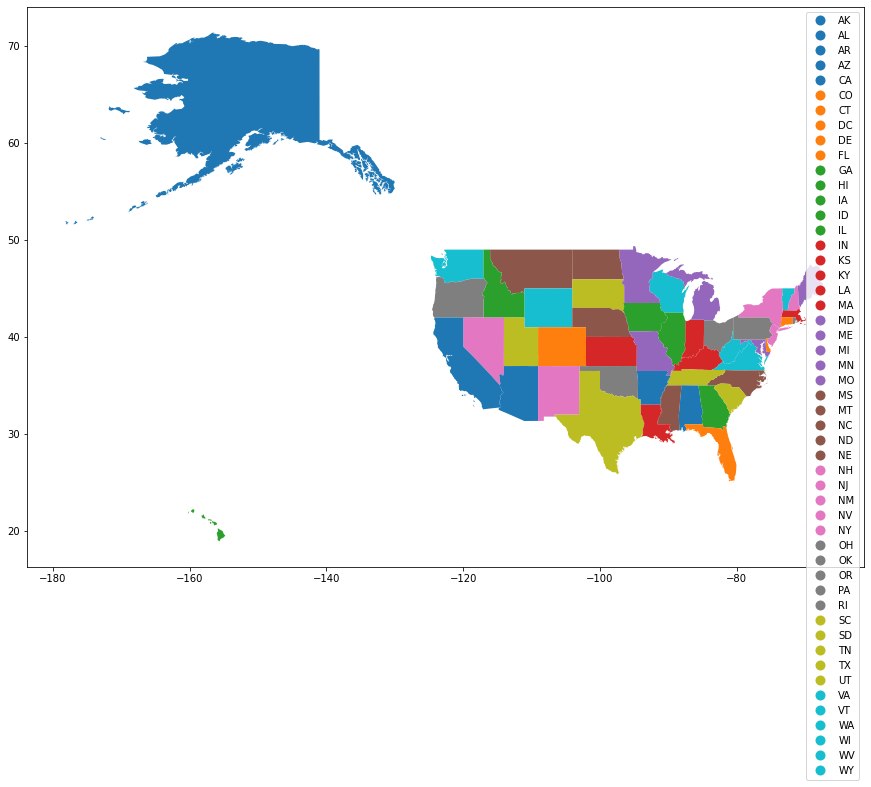

In [26]:
#Let's see if our shp file is correct
states_shp.plot("STATE_ABBR", figsize=(15,15), legend=True)
#OK!

In [27]:
# merge the dataframe with the geodataframe
df = states_shp.merge(seatbelts_evo, on='STATE_ABBR', how='left')
df = df.dropna() #drop nans

#reconvert to gpd 
us_seatbelt = gpd.GeoDataFrame(df)
us_seatbelt.head()

#OK! Now let's plot.

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,fatal83,fatal97
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",0.019312,0.013204
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",0.039827,0.028216
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",0.028269,0.014496
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",0.021630,0.014741
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",0.027703,0.018645


In [28]:
#First, let's see some relevant statistics
us_seatbelt.describe()

,fatal83,fatal97
count,51.000000,51.000000
mean,0.027162,0.017243
std,0.006800,0.004146
min,0.016628,0.008738
25%,0.021869,0.013941
50%,0.026143,0.017552
75%,0.030853,0.020174
max,0.045470,0.028216


In [34]:
# before plotting, check the min and max values of fatal rates

print('MIN VALUES')
print('---------')
print(us_seatbelt.min())
print('***************************')
print('MAX VALUES')
print('---------')
print(us_seatbelt.max())

#as it is seen, MAX is in "fatal83" and MIN is in "fatal97" column

MIN VALUES
---------
STATE_NAME     Alabama
STATE_FIPS          01
STATE_ABBR          AK
fatal83       0.016628
fatal97       0.008738
dtype: object
***************************
MAX VALUES
---------
STATE_NAME     Wyoming
STATE_FIPS          56
STATE_ABBR          WY
fatal83        0.04547
fatal97       0.028216
dtype: object


C:\Users\luisc\AppData\Local\Temp\ipykernel_5392\3151673315.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(us_seatbelt.min())
C:\Users\luisc\AppData\Local\Temp\ipykernel_5392\3151673315.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(us_seatbelt.max())


In [37]:
# extract the min and max values of fatal rates
minim= us_seatbelt.fatal97.min()
maxim= us_seatbelt.fatal83.max()

print('MIN VALUE:')
print(minim)
print('MAX VALUE:')
print(maxim)

MIN VALUE:
0.0087382
MAX VALUE:
0.0454701


In [38]:
#Choose the color for the map, and stack the color range
value_min = minim
value_max = maxim
cmap = 'Reds'


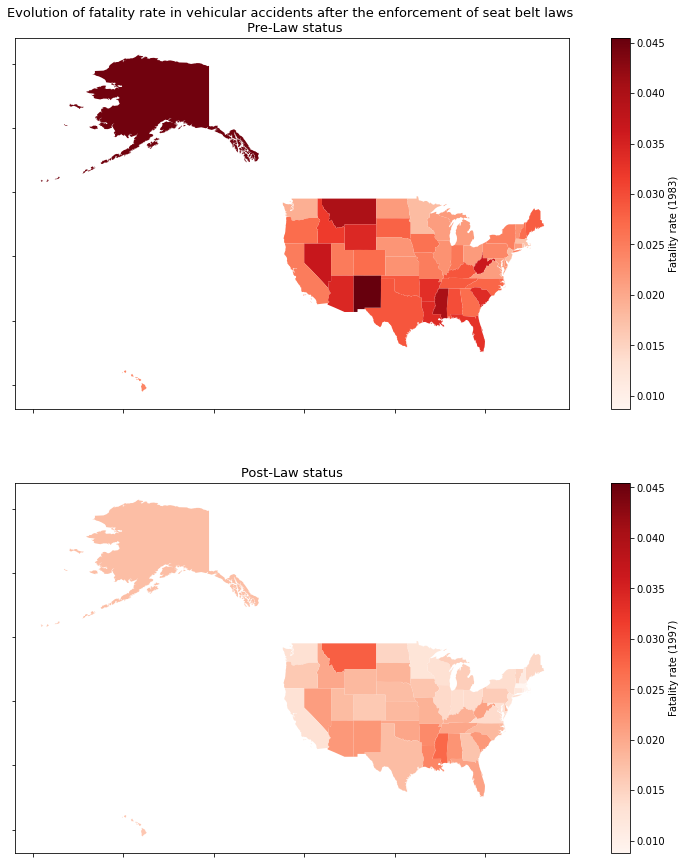

In [95]:
#Now, plot 
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15), sharex=True, sharey=True)
ax1.set_title("Evolution of fatality rate in vehicular accidents after the enforcement of seat belt laws \n Pre-Law status", fontdict={'fontsize':13})
ax2.set_title("Post-Law status", fontdict={'fontsize':13})
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xticklabels([]) #to not show alt and lat values at axis

us_seatbelt.plot(column='fatal83' , vmin=value_min, vmax=value_max, cmap=cmap,
           ax=ax1,
           legend=True,
           legend_kwds={'label': "Fatality rate (1983)",
                        'orientation': "vertical"})


us_seatbelt.plot(column='fatal97',vmin=value_min, vmax=value_max, cmap=cmap,
           ax=ax2,
           legend=True,
           legend_kwds={'label': "Fatality rate (1997)",
                        'orientation': "vertical"})
plt.show()


In [ ]:
# As you can see, the implemention of the seat belts law help a lot to reduce taffic fatality rates. 